## Homework: Role of Frisch Elasticity

A key parameter that affects how volatile are hours worked over the business cycle is the so called [Frisch elasticity of labor supply](https://en.wikipedia.org/wiki/Frisch_elasticity_of_labor_supply).

It turns out, that our log-log utility function that we have used has a certain Frisch elasticity "baked in". For example, if the average hours worked are 1/3 of total time available, then it necessarily implies that the Frisch elasticity is equal to 2.

We might want to be able to change the value of this parameter. Therefore, we will use a slightly different utility function. The household will then solve the following problem:

\begin{align*}
\max\quad & U_{t}=\mathrm{E}_{t}\left[\sum_{i=0}^{\infty}\beta^{i}\left(\log c_{t+i}-\phi\frac{h_{t+i}^{1+\eta}}{1+\eta}\right)\right]\\
\text{subject to}\quad & c_{t}+a_{t+1}=w_{t}h_{t}+\left(1+r_{t}\right)a_{t}+d_{t}
\end{align*}

where the parameter $\eta$ (`eta`) is the inverse of the Frisch elasticity of labor supply.

In [12]:
from Dynare import *
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader

rho_z    = 0.9598499596182404
stderr_z = 0.008016122502811389
var = 'y c i k h w r z yh R'
varexo = 'e'

**Task 1**: Derive the first order condition of the households and the optimality condition for the consumption-labor choice. Modify accordingly the code below.

In [2]:
param_values_Frisch = {'alpha':0.33, sy.symbols('beta'):0.99, 'delta':0.025, 'phi':4.5511, 'rho':rho_z, 'eta':0.5}

model_Frisch = ('-1/c + betta/c(+1)*(1+r(+1))',# why is there no Expectation_t in eular Eqation ?
         '-h^eta+w/(phi*c)', # The labor in consumption-labor choice equation means hour?
         '-y + z*k(-1)^alpha*h^(1-alpha)', # Why is it t-1 under k ?
         '-r + alpha*y/k(-1) - delta', 
         '-w + (1-alpha)*y/h',
         '-k + i + (1-delta)*k(-1)',
         '-y + c + i',
         '-log(z) + rho*log(z(-1)) + e',
         '-yh + y/h',
         '-R + 1+r')

initval = (1, 0.8, 0.2, 10, 0.33, 2, 0.01, 1, 3, 1.01)
rbc_Frisch = Dynare(var, varexo, param_values_Frisch, model_Frisch, initval)
rbc_Frisch.system

⎡      β⋅(r_{t+1} + 1)     1        ⎤
⎢      ─────────────── - ─────      ⎥
⎢          c_{t+1}       c_{t}      ⎥
⎢                                   ⎥
⎢               η    w_{t}          ⎥
⎢        - h_{t}  + ───────         ⎥
⎢                   c_{t}⋅φ         ⎥
⎢                                   ⎥
⎢      1 - α        α               ⎥
⎢ h_{t}     ⋅k_{t-1} ⋅z_{t} - y_{t} ⎥
⎢                                   ⎥
⎢        α⋅y_{t}                    ⎥
⎢        ─────── - δ - r_{t}        ⎥
⎢        k_{t-1}                    ⎥
⎢                                   ⎥
⎢               y_{t}⋅(1 - α)       ⎥
⎢      -w_{t} + ─────────────       ⎥
⎢                   h_{t}           ⎥
⎢                                   ⎥
⎢  i_{t} + k_{t-1}⋅(1 - δ) - k_{t}  ⎥
⎢                                   ⎥
⎢       c_{t} + i_{t} - y_{t}       ⎥
⎢                                   ⎥
⎢e_{t} + ρ⋅log(z_{t-1}) - log(z_{t})⎥
⎢                                   ⎥
⎢                    y_{t}          ⎥
⎢          -

**Task 2**: Verify that the above model produces exactly the same steady state and very similar simulated moments as the basic RBC model.


STEADY-STATE RESULTS

y 	1.0051
c 	0.7689
i 	0.2362
k 	9.4495
h 	0.3333
w 	2.0203
r 	0.0101
z 	1.0000
yh 	3.0153
R 	1.0101

POLICY AND TRANSITION FUNCTIONS

		y	c	i	k	h	w	r	z	yh	R
Constant	1.0051	0.7689	0.2362	9.4495	0.3333	2.0203	0.0101	1.0000	3.0153	1.0101
k(-1) 		0.0173	0.0437	-0.0264	0.9486	-0.0088	0.0882	-0.0031	0.0000	0.1316	-0.0031
z(-1) 		1.3931	0.3321	1.0610	1.0610	0.2120	1.5151	0.0487	0.9598	2.2613	0.0487
e     		1.4514	0.3460	1.1054	1.1054	0.2209	1.5785	0.0507	1.0000	2.3559	0.0507



	Impulse response functions to e


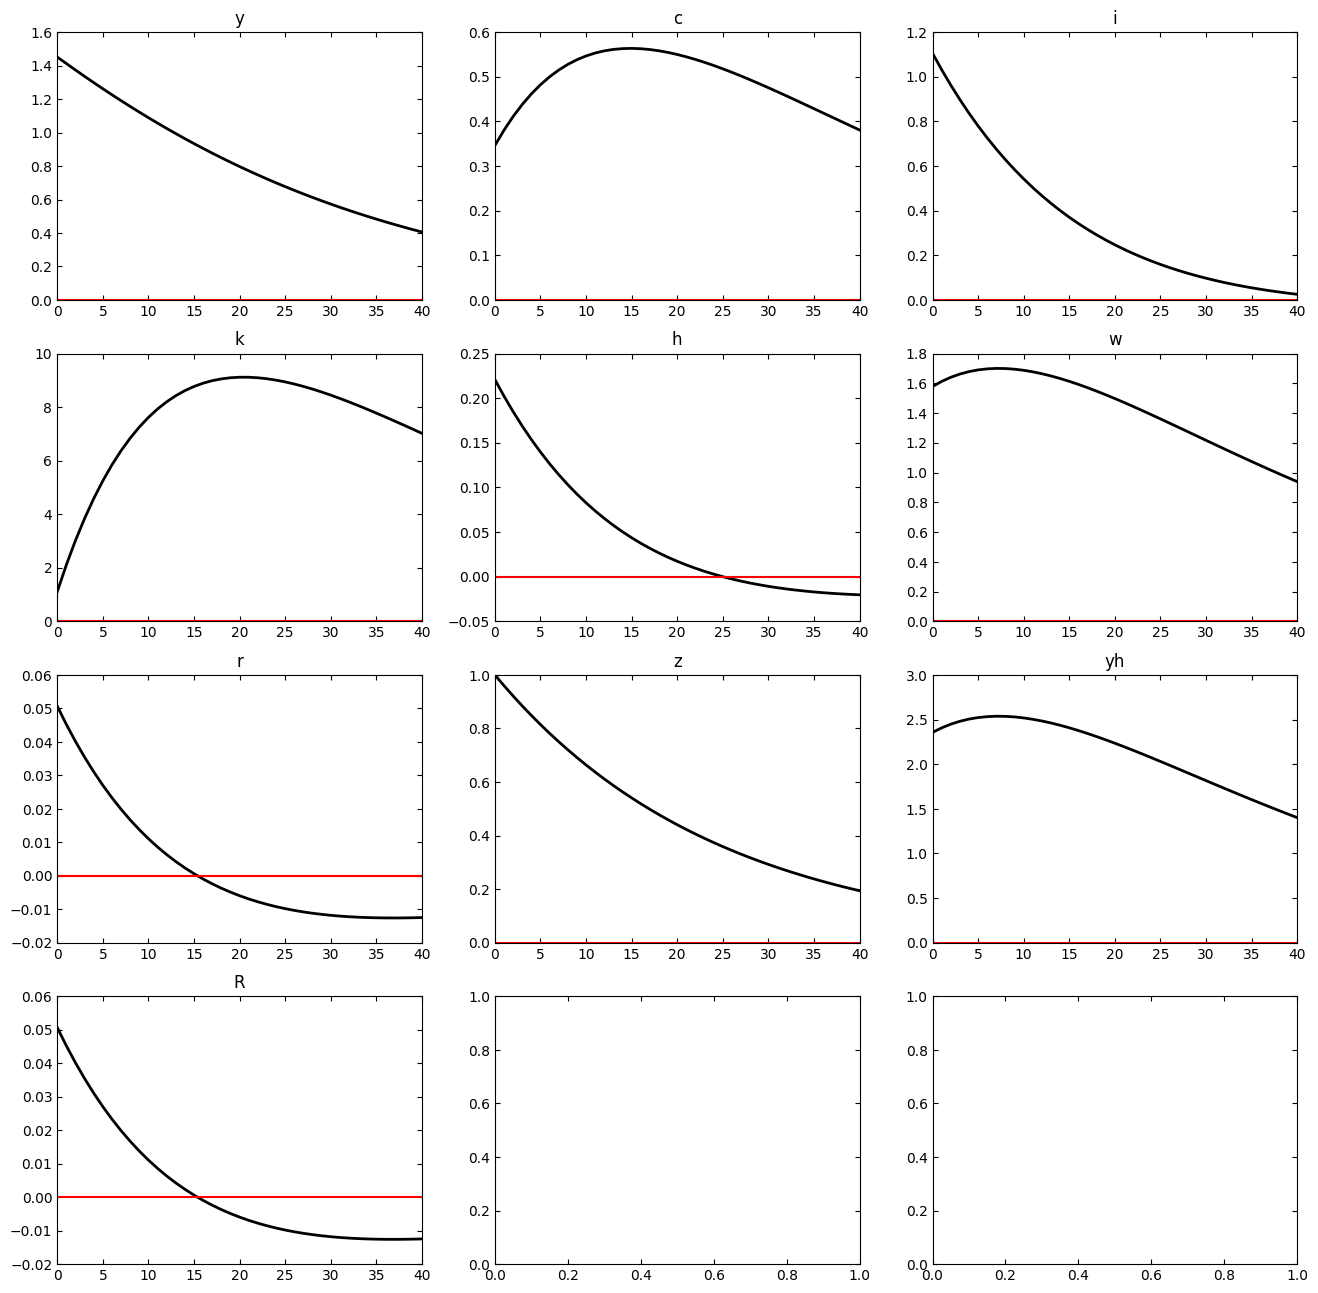

In [3]:
rbc = Dynare(var, varexo, param_values_Frisch, model_Frisch, initval)
rbc.steady()
rbc.stoch_simul(irf=40)

In [6]:
rbc.SimulatedMoments(hp_filter=1600, shocks_stderr=stderr_z)

SIMULATED MOMENTS

VARIABLE 	 STD. DEV.
y 		 1.9161
c 		 0.6302
i 		 6.5050
k 		 0.5649
h 		 1.3146
w 		 0.6831
r 		 7.0116
z 		 1.0376
yh 		 0.6831
R 		 0.0678

COEFFICIENTS OF AUTOCORRELATION
y 		 0.7142
c 		 0.8071
i 		 0.7026
k 		 0.9596
h 		 0.7005
w 		 0.7920
r 		 0.7019
z 		 0.7132
yh 		 0.7920
R 		 0.7011

MATRIX OF CORRELATIONS
Variables 	 y
y 		 1.0000
c 		 0.8967
i 		 0.9865
k 		 0.3643
h 		 0.9783
w 		 0.9212
r 		 0.9493
z 		 0.9996
yh 		 0.9212
R 		 0.9558


**Task 3**: Use the alternative parametrization below. Under the new parametrization, compute the simulated moments of the model and **compare the relative standard deviation of hours** to output with the results we got for the basic RBC model.


STEADY-STATE RESULTS

y 	1.0051
c 	0.7689
i 	0.2362
k 	9.4496
h 	0.3333
w 	2.0203
r 	0.0101
z 	1.0000
yh 	3.0153
R 	1.0101

POLICY AND TRANSITION FUNCTIONS

		y	c	i	k	h	w	r	z	yh	R
Constant	1.0051	0.7689	0.2362	9.4496	0.3333	2.0203	0.0101	1.0000	3.0153	1.0101
k(-1) 		0.0028	0.0409	-0.0381	0.9369	-0.0160	0.1026	-0.0036	0.0000	0.1531	-0.0036
z(-1) 		1.7790	0.3847	1.3943	1.3943	0.4031	1.1330	0.0621	0.9598	1.6911	0.0621
e     		1.8535	0.4008	1.4526	1.4526	0.4199	1.1804	0.0647	1.0000	1.7618	0.0647



	Impulse response functions to e


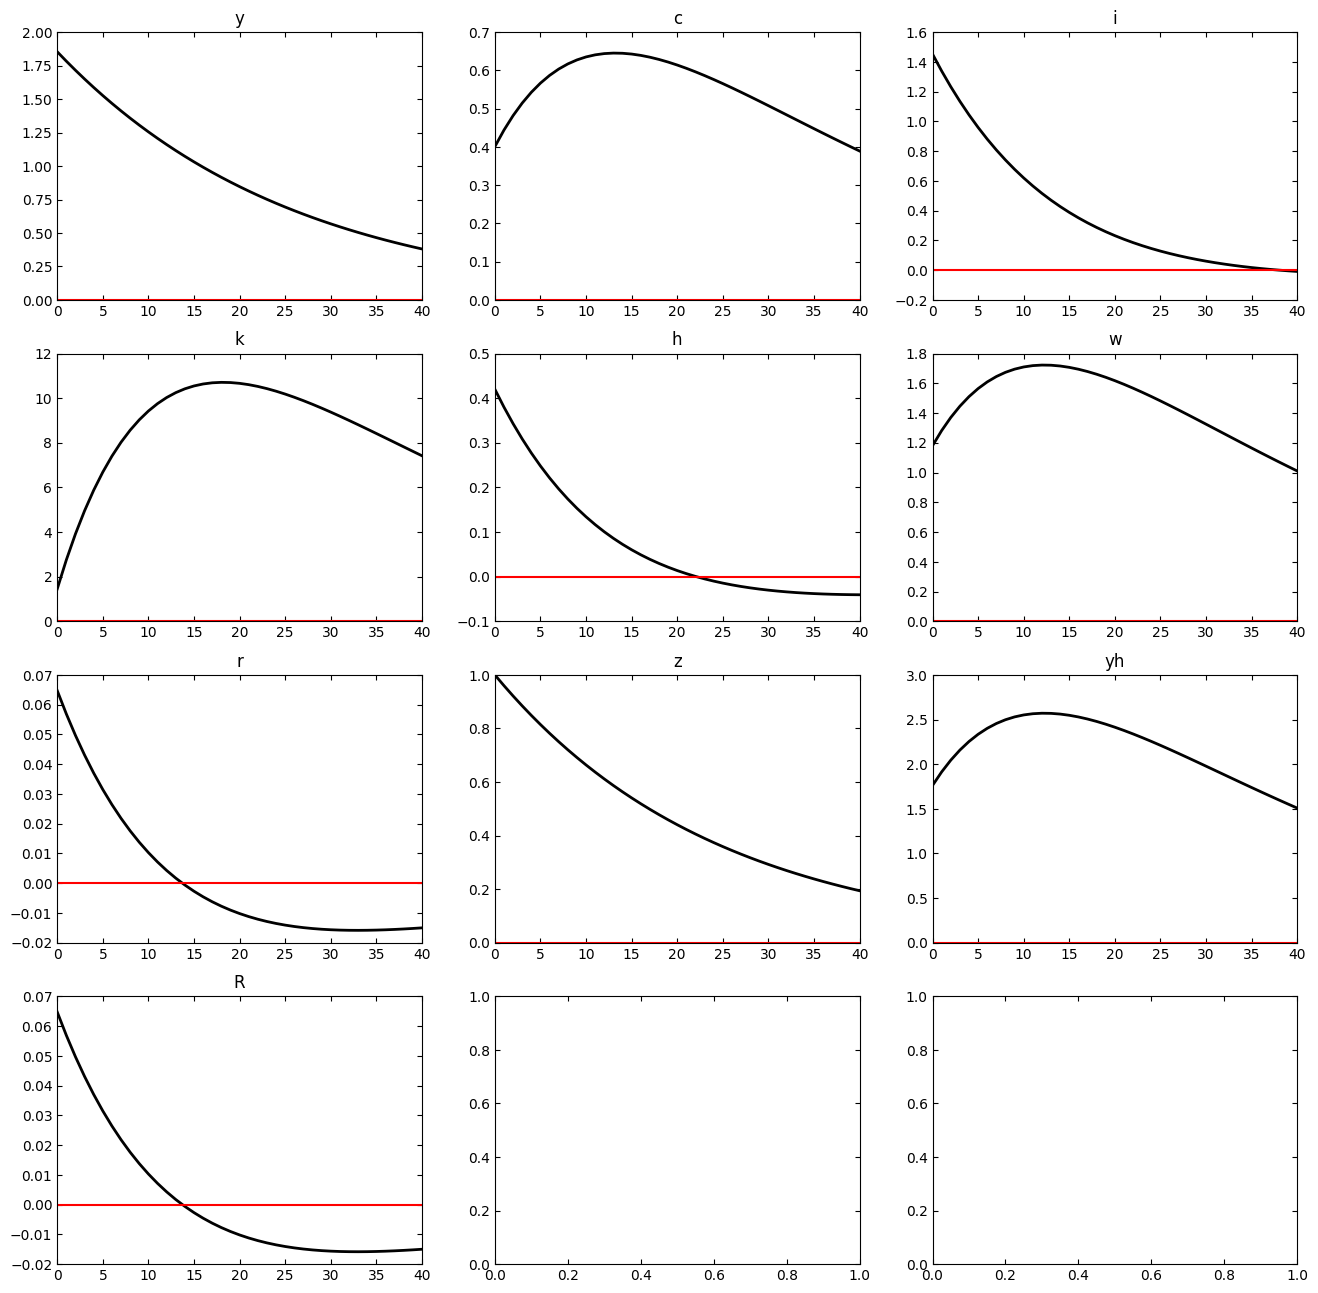

In [4]:
param_values_Frisch_alt = {'alpha':0.33, sy.symbols('beta'):0.99, 'delta':0.025, 'phi':2.7759, 'rho':rho_z, 'eta':0.05}
rbc = Dynare(var, varexo, param_values_Frisch_alt, model_Frisch, initval)
rbc.steady()
rbc.stoch_simul(irf=40)

In [16]:
pop = DataReader(['B230RC0Q173SBEA', 'CNP16OV'], 'fred', start=start, end=end)
pop = pop.dropna()
pop = pop.resample('QS').mean()
pop = pop.dropna()

pop_hp_cycle = pd.DataFrame()
pop_hp_trend = pd.DataFrame()
for col in pop.columns:
    # HP Filter（lambda）uses log
    pop_hp_cycle[col], pop_hp_trend[col] = sm.tsa.filters.hpfilter(np.log(pop[col]), lamb=1600)   
pop_smooth = np.exp(pop_hp_trend)

start = '1945-01'
end   = '2021-06'
fred = DataReader(['GDP', 'PCND', 'PCESV', 'PCDG', 'FPI', 'GDPDEF',
                   'PRS85006053', 'HOANBS', 'COMPNFB', 'TB3MS'],
                  'fred', start=start, end=end)
fred = fred.dropna()
fred = fred.resample('QS').mean()
fred = fred.dropna()

dta = pd.DataFrame()
dta['Output'] = np.log(fred['GDP']*10**9/fred['GDPDEF']*100
                       /(pop_smooth['CNP16OV']*10**3))
dta['Consumption'] = np.log((fred['PCND']+fred['PCESV'])*10**9/fred['GDPDEF']*100
                            /(pop_smooth['CNP16OV']*10**3))
dta['Investment'] = np.log((fred['PCDG']+fred['FPI'])*10**9/fred['GDPDEF']*100
                           /(pop_smooth['CNP16OV']*10**3))
dta['Capital'] = 0*dta['Output']
dta['Hours'] = np.log(fred['HOANBS']*100*fred['GDP']/np.mean(fred['GDP']['2010-01':'2010-10'])
                      /fred['PRS85006053']/pop_smooth['CNP16OV'])
dta['Wages'] = np.log(fred['COMPNFB']/fred['GDPDEF']*100)
dta['Interest Rate'] = np.log( (1+fred['TB3MS']/100)**(1/4)/(1+fred['GDPDEF'].pct_change()) )
dta['TFP'] = 0*dta['Output']
dta['Productivity'] = np.log(fred['PRS85006053']/fred['GDPDEF']*100)-dta['Hours']
dta['Price Level'] = np.log(fred['GDPDEF'])
dta = dta.dropna()

hp_cycles = pd.DataFrame()
hp_trend = pd.DataFrame()
cf_cycles = pd.DataFrame()
cf_trend = pd.DataFrame()
for col in dta.columns:
    hp_cycles[col], hp_trend[col] = sm.tsa.filters.hpfilter((100*dta[col]).dropna(), lamb=1600)
    cf_cycles[col], cf_trend[col] = sm.tsa.filters.cffilter((100*dta[col]).dropna(), low=6, high=32)

In [17]:
print('Standard Deviations')
print(round(hp_cycles.std(),4))

print('')
print('Autocorrelations')
a = list(dta.columns.values[:10])
for i in range(len(a)):
    print(dta.columns.values[i], '  \t\t', round(hp_cycles[dta.columns.values[i]].autocorr(),4))

print('')
print('Correlations')
print(round(hp_cycles.corr(method='pearson'),4))

Standard Deviations
Output           1.6667
Consumption      1.0809
Investment       4.4800
Capital          0.0000
Hours            1.7360
Wages            0.9136
Interest Rate    0.3941
TFP              0.0000
Productivity     1.3049
Price Level      0.8863
dtype: float64

Autocorrelations
Output   		 0.7781
Consumption   		 0.6164
Investment   		 0.8588
Capital   		 nan
Hours   		 0.8107
Wages   		 0.6424
Interest Rate   		 0.4153
TFP   		 nan
Productivity   		 0.6378
Price Level   		 0.9051

Correlations
               Output  Consumption  Investment  Capital   Hours   Wages  \
Output         1.0000       0.7557      0.7708      NaN  0.8247 -0.0590   
Consumption    0.7557       1.0000      0.5399      NaN  0.7291 -0.1250   
Investment     0.7708       0.5399      1.0000      NaN  0.6070  0.0010   
Capital           NaN          NaN         NaN      NaN     NaN     NaN   
Hours          0.8247       0.7291      0.6070      NaN  1.0000 -0.2669   
Wages         -0.0590      -0.1250  